In [2]:
from imports import *
from dataset import *

model = AutoModelForCausalLM.from_pretrained('EleutherAI/pythia-70m')
tokenizer = AutoTokenizer.from_pretrained('EleutherAI/pythia-70m')

train_data, val_data = inspect_data(data)

/Users/maheepchaudhary/miniforge3/envs/transit/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'Training set size: 2119719'
'Validation set size: 21990'
['text']
{'text': Value(dtype='string', id=None)}

'---------------------------------'



/Users/maheepchaudhary/miniforge3/envs/transit/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [28]:
val_analysis_vanilla = []
val_analysis_tokenized = []

for sample in tqdm(val_data["text"]):
    # val_analysis.append(len(tokenizer))
    val_analysis_vanilla.append(len(sample.split()))
    val_analysis_tokenized.append(np.array(tokenizer(sample, return_tensors="pt")["input_ids"]).shape[1])

  0%|          | 0/21990 [00:00<?, ?it/s]/var/folders/_x/mkf1szd12yv28px5ztl_sjjr0000gn/T/ipykernel_81838/1872279689.py:7: DeprecationWarning:

__array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.

100%|██████████| 21990/21990 [00:07<00:00, 2835.17it/s]


In [29]:
from collections import Counter

count_vanilla = Counter(val_analysis_vanilla)
count_tokenized = Counter(val_analysis_tokenized)

In [30]:
import plotly.graph_objs as go
from collections import Counter



# Get the unified set of keys from both dictionaries
all_keys = sorted(set(count_vanilla.keys()).union(set(count_tokenized.keys())))

# Fill missing counts with 0 for both lists
y1 = [count_vanilla.get(key, 0) for key in all_keys]
y2 = [count_tokenized.get(key, 0) for key in all_keys]

# Create two bar traces, one for each list
trace1 = go.Scatter(x=all_keys, y=y1, name='List 1 Count')
trace2 = go.Scatter(x=all_keys, y=y2, name='List 2 Count')

# Layout configuration
layout = go.Layout(
    title="Tiny Stories Dataset average string length count",
    xaxis=dict(title='Values'),
    yaxis=dict(title='Counts'),
    barmode='group'  # 'group' places bars side-by-side
)

# Combine the traces into a figure
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Show the plot
fig.show()


In [49]:
from imports import * 

# data_novel = load_dataset("alpindale/light-novels")
data_novel = load_dataset("databricks/databricks-dolly-15k")
data_alpaca = load_dataset("tatsu-lab/alpaca")

Generating train split: 100%|██████████| 52002/52002 [00:00<00:00, 619107.51 examples/s]


In [51]:
data_alpaca['train']

Dataset({
    features: ['instruction', 'input', 'output', 'text'],
    num_rows: 52002
})

In [52]:
data_novel_analysis = []
data_novel_analysis_tokenized = []

for sample in tqdm(data_alpaca['train']['instruction']):
    data_novel_analysis.append(len(sample))
    # data_novel_analysis_tokenized.append(np.array(tokenizer(sample['text'], return_tensors="pt")["input_ids"]).shape[1])

100%|██████████| 52002/52002 [00:00<00:00, 7724613.85it/s]


In [53]:
from collections import Counter

count_vanilla = Counter(data_novel_analysis)
# count_tokenized = Counter(data_novel_analysis_tokenized)
print(count_vanilla)

Counter({50: 1282, 49: 1270, 53: 1263, 52: 1233, 54: 1229, 57: 1222, 56: 1193, 51: 1188, 58: 1185, 48: 1180, 55: 1173, 46: 1137, 60: 1116, 59: 1116, 61: 1112, 47: 1106, 62: 1094, 45: 1060, 63: 1045, 44: 1033, 43: 984, 64: 971, 65: 944, 42: 924, 66: 908, 68: 879, 41: 836, 67: 827, 40: 812, 39: 793, 69: 775, 70: 740, 71: 737, 38: 686, 37: 658, 74: 645, 73: 638, 72: 625, 36: 619, 75: 561, 35: 555, 76: 541, 77: 510, 78: 489, 34: 472, 79: 424, 33: 422, 80: 417, 32: 412, 81: 381, 82: 377, 83: 369, 84: 363, 31: 360, 85: 319, 86: 312, 30: 308, 87: 291, 29: 272, 88: 261, 28: 259, 90: 232, 27: 223, 89: 223, 91: 209, 93: 196, 26: 194, 92: 192, 94: 179, 95: 156, 96: 156, 98: 145, 97: 142, 25: 134, 100: 127, 102: 126, 99: 113, 104: 103, 24: 100, 103: 100, 101: 93, 107: 86, 106: 83, 23: 80, 105: 78, 109: 77, 22: 74, 110: 70, 112: 67, 111: 65, 108: 59, 114: 54, 21: 49, 113: 49, 115: 49, 117: 48, 116: 40, 122: 39, 120: 38, 121: 37, 119: 36, 123: 32, 130: 32, 124: 31, 118: 30, 126: 29, 20: 28, 132: 26,

In [54]:
import plotly.graph_objs as go
from collections import Counter

# Using your count_vanilla data
keys = list(count_vanilla.keys())
values = list(count_vanilla.values())

# Create a line plot
trace = go.Scatter(x=keys, y=values, mode='lines', line=dict(color='blue'))

# Layout configuration
layout = go.Layout(
    title="Line Plot of Count Distribution for Vanilla Data",
    xaxis=dict(title='Values'),
    yaxis=dict(title='Counts')
)

# Combine the trace and layout into a figure
fig = go.Figure(data=[trace], layout=layout)

# Show the plot
fig.show()


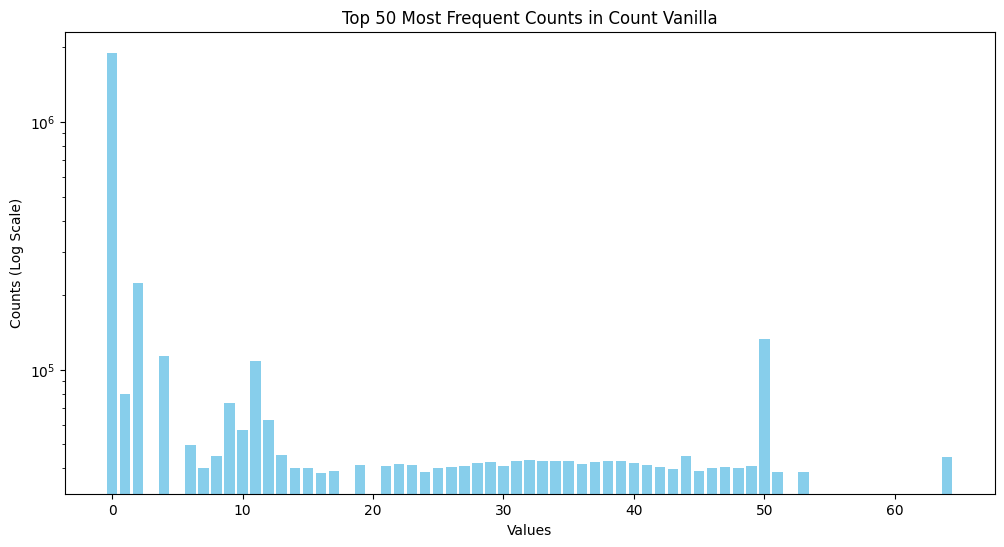

In [14]:


# Get the top 50 most frequent items
top_50 = count_vanilla.most_common(50)

# Separate the keys (values) and counts
keys, values = zip(*top_50)

# Create the plot
plt.figure(figsize=(12, 6))
plt.bar(keys, values, color='skyblue')

# Add titles and labels
plt.title('Top 50 Most Frequent Counts in Count Vanilla')
plt.xlabel('Values')
plt.ylabel('Counts (Log Scale)')

# Apply logarithmic scaling to y-axis
plt.yscale('log')

# Display the plot
plt.show()

plt.show()


In [12]:
count_vanilla

Counter({0: 1902055,
         2: 224691,
         50: 133088,
         4: 114078,
         11: 108547,
         1: 79518,
         9: 73288,
         12: 62661,
         10: 57279,
         6: 49811,
         13: 45133,
         8: 45094,
         44: 44997,
         64: 44684,
         32: 43380,
         38: 43059,
         31: 42872,
         35: 42802,
         33: 42797,
         39: 42789,
         34: 42789,
         29: 42468,
         37: 42342,
         28: 42143,
         40: 41880,
         22: 41778,
         36: 41754,
         41: 41399,
         23: 41228,
         19: 41116,
         27: 40961,
         49: 40939,
         21: 40871,
         30: 40839,
         26: 40724,
         42: 40542,
         47: 40387,
         15: 40336,
         14: 40263,
         25: 40212,
         48: 40109,
         46: 40062,
         7: 40013,
         43: 39726,
         17: 39022,
         45: 38947,
         24: 38788,
         53: 38705,
         51: 38614,
         16: 38440,
  